In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

sns.set_style('white')

## Predicting Flight Delay Time from 2008 Arrivals Data <br> Eve Ben Ezra


I want to see if we can predict flight delay time (delay by >30min) using data from 2008 flight arrivals. The data comes from [this dataset](http://stat-computing.org/dataexpo/2009/the-data.html)

In [2]:
data = pd.read_csv('2008.csv')

In [3]:
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [4]:
data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [5]:
data.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [6]:
data.shape

(7009728, 29)

### Exploration and Cleaning

#### Step 1. We only want to look at flights with a significant delay >30, so filter out the others

In [7]:
data = data.loc[lambda df: data['ArrDelay'] > 30, :]

In [8]:
# Explore the new shape

data.shape

(901398, 29)

We're left with a dataframe that has 901,398 entries and 29 columns or features

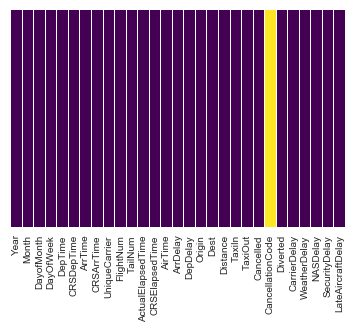

In [10]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Here's a heatmap of missing data. The only place there is missing data is the 'cancellationcode' column which makes sense. Since all of our flights are delayed (we're not counting cancelled flights in the 'delayed' category), they won't have a cancellation code. As well, the 'cancelled' column won't give us any useful data. So we'll delete both those rows.

In [9]:
data = data.drop(['Cancelled','CancellationCode','Diverted','CRSDepTime','CRSArrTime'],axis=1)

In [10]:
data.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,901398.0,901398.000000,901398.000000,901398.000000,901398.000000,901398.000000,901398.000000,901398.000000,901398.000000,901398.000000,901398.000000,901398.000000,901398.000000,901398.000000,901398.000000,901398.000000,901398.000000,901398.000000,901398.000000,901398.000000
mean,2008.0,6.079005,15.734794,3.979588,1568.106388,1605.773997,2311.867965,144.097656,134.745723,111.249369,81.351885,71.999945,757.000534,7.983719,24.864568,22.743994,4.816709,22.517477,0.080223,31.193481
std,0.0,3.525130,8.815707,1.993993,468.847231,617.093038,2026.915408,76.667791,71.115679,70.952283,63.569957,66.489399,571.469009,7.671975,22.080898,50.511957,25.095842,39.852576,2.222620,47.842947
min,2008.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,-141.000000,0.000000,31.000000,-45.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,3.000000,8.000000,2.000000,1237.000000,1316.000000,644.000000,88.000000,83.000000,60.000000,42.000000,34.000000,337.000000,4.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,6.000000,16.000000,4.000000,1631.000000,1746.000000,1601.000000,127.000000,117.000000,93.000000,61.000000,56.000000,604.000000,6.000000,17.000000,0.000000,0.000000,5.000000,0.000000,6.000000
75%,2008.0,9.000000,23.000000,6.000000,1935.000000,2057.000000,3773.000000,178.000000,165.000000,140.000000,98.000000,93.000000,989.000000,9.000000,29.000000,30.000000,0.000000,32.000000,0.000000,47.000000
max,2008.0,12.000000,31.000000,7.000000,2400.000000,2400.000000,9741.000000,1379.000000,660.000000,1350.000000,2461.000000,2467.000000,4962.000000,308.000000,429.000000,2436.000000,1352.000000,1357.000000,392.000000,1316.000000


In [12]:
data = data.drop(['CRSElapsedTime'],axis=1)

In [14]:
data.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,901398.0,901398.000000,901398.000000,901398.000000,901398.000000,901398.000000,901398.000000,901398.000000,901398.000000,901398.000000,...,901398.000000,901398.000000,901398.000000,901398.000000,901398.000000,901398.000000,901398.000000,901398.000000,901398.000000,901398.000000
mean,2008.0,6.079005,15.734794,3.979588,1568.106388,1484.404798,1605.773997,1653.630608,2311.867965,144.097656,...,81.351885,71.999945,757.000534,7.983719,24.864568,22.743994,4.816709,22.517477,0.080223,31.193481
std,0.0,3.525130,8.815707,1.993993,468.847231,425.709030,617.093038,465.000868,2026.915408,76.667791,...,63.569957,66.489399,571.469009,7.671975,22.080898,50.511957,25.095842,39.852576,2.222620,47.842947
min,2008.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,15.000000,...,31.000000,-45.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,3.000000,8.000000,2.000000,1237.000000,1149.000000,1316.000000,1339.000000,644.000000,88.000000,...,42.000000,34.000000,337.000000,4.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,6.000000,16.000000,4.000000,1631.000000,1530.000000,1746.000000,1729.000000,1601.000000,127.000000,...,61.000000,56.000000,604.000000,6.000000,17.000000,0.000000,0.000000,5.000000,0.000000,6.000000
75%,2008.0,9.000000,23.000000,6.000000,1935.000000,1830.000000,2057.000000,2025.000000,3773.000000,178.000000,...,98.000000,93.000000,989.000000,9.000000,29.000000,30.000000,0.000000,32.000000,0.000000,47.000000
max,2008.0,12.000000,31.000000,7.000000,2400.000000,2359.000000,2400.000000,2359.000000,9741.000000,1379.000000,...,2461.000000,2467.000000,4962.000000,308.000000,429.000000,2436.000000,1352.000000,1357.000000,392.000000,1316.000000


In [13]:
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
4,2008,1,3,4,1829.0,1959.0,WN,3920,N464WN,90.0,...,IND,BWI,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
6,2008,1,3,4,1937.0,2037.0,WN,509,N763SW,240.0,...,IND,LAS,1591,3.0,7.0,10.0,0.0,0.0,0.0,47.0
11,2008,1,3,4,1644.0,1845.0,WN,1333,N334SW,121.0,...,IND,MCO,828,6.0,8.0,8.0,0.0,0.0,0.0,72.0
19,2008,1,3,4,1416.0,1512.0,WN,54,N643SW,56.0,...,ISP,BWI,220,2.0,5.0,12.0,0.0,0.0,0.0,25.0
26,2008,1,3,4,1422.0,1657.0,WN,188,N215WN,155.0,...,ISP,FLL,1093,6.0,6.0,40.0,0.0,0.0,0.0,7.0


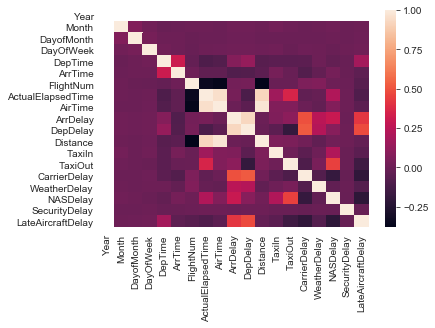

In [14]:
sns.heatmap(data.corr())

In [21]:
data.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

We want to look at the UniqueCarrier codes, as well as origin and destination. These are our only strings. I'm assuming there are a lot of unique entries for all of these, but we'll get dummies for them and drop the first. It might be valuable in our model.

In [15]:
carrier = pd.get_dummies(data['UniqueCarrier'],drop_first=True)
origin = pd.get_dummies(data['Origin'],drop_first=True)
destination = pd.get_dummies(data['Dest'],drop_first=True)

In [16]:
delays = pd.DataFrame

In [17]:
delays = pd.concat([data, carrier, origin, destination],axis=1)

In [18]:
delays.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,TYR,TYS,VLD,VPS,WRG,WYS,XNA,YAK,YKM,YUM
4,2008,1,3,4,1829.0,1959.0,WN,3920,N464WN,90.0,...,0,0,0,0,0,0,0,0,0,0
6,2008,1,3,4,1937.0,2037.0,WN,509,N763SW,240.0,...,0,0,0,0,0,0,0,0,0,0
11,2008,1,3,4,1644.0,1845.0,WN,1333,N334SW,121.0,...,0,0,0,0,0,0,0,0,0,0
19,2008,1,3,4,1416.0,1512.0,WN,54,N643SW,56.0,...,0,0,0,0,0,0,0,0,0,0
26,2008,1,3,4,1422.0,1657.0,WN,188,N215WN,155.0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
delays = delays.drop(['Origin','Dest','TailNum','UniqueCarrier'],axis=1)

In [40]:
delays.shape

(901398, 645)

# 1. Model: LASSO regression

### Train test split

In [22]:
from sklearn.model_selection import train_test_split

In [27]:
delays.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
ArrTime              float64
FlightNum              int64
ActualElapsedTime    float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Distance               int64
TaxiIn               float64
TaxiOut              float64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
AA                     uint8
AQ                     uint8
AS                     uint8
B6                     uint8
CO                     uint8
DL                     uint8
EV                     uint8
F9                     uint8
FL                     uint8
HA                     uint8
MQ                     uint8
                      ...   
SPI                    uint8
SPS                    uint8
SRQ                    uint8
STL           

In [28]:
X = delays.drop('ArrDelay',axis=1)
y = delays['ArrDelay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Make and Train the Model

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lasso_lr = LogisticRegression(C=.05, penalty='l1')

In [ ]:
# Fit the model
fit = lasso_lr.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Attempting to run this kills the kernel. 

In [ ]:
# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lasso_lr.predict(X_train)

print('\n Accuracy by high value')
print(pd.crosstab(pred_y_sklearn, y_train))

print('\n Percentage accuracy')
print(lasso_lr.score(X_train, y_train))

print(cross_val_score(lasso_lr, X_train, y_train, cv=10))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
